In [3]:
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
import matplotlib.pyplot  as plt

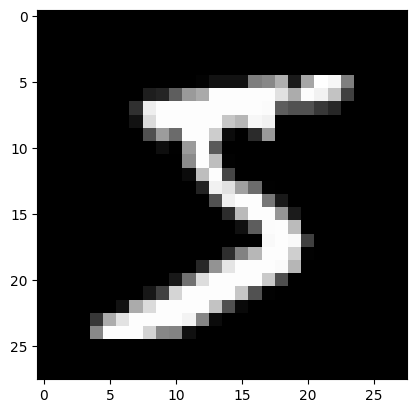

In [9]:
plt.imshow(X_train[0])
plt.imshow(X_train[0],cmap='gray')

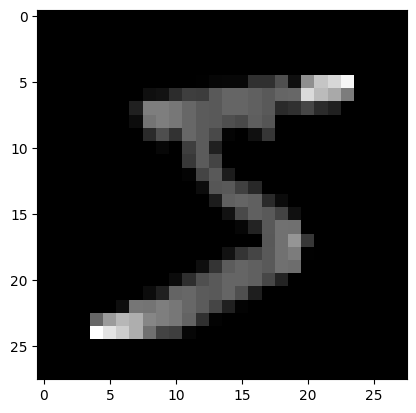

In [10]:
X_train=tf.keras.utils.normalize(X_train, axis=1)
X_test=tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0],cmap='gray')

In [11]:
import numpy as np
X_trainr=np.array(X_train).reshape(-1,28,28,1)
X_testr=np.array(X_test).reshape(-1,28,28,1)
X_trainr[0].shape

(28, 28, 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [13]:
model=Sequential()

In [16]:
model.add(Conv2D(filters=64,kernel_size=3,input_shape=(28,28,1),activation='relu'))
# model.add(activation='relu')
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd convolution layer
model.add(Conv2D(filters=64,kernel_size=3,input_shape=(28,28,1),activation='relu'))
# model.add(activation='relu')
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd convolution layer
model.add(Conv2D(filters=64,kernel_size=3,input_shape=(28,28,1),activation='relu'))
# model.add(activation='relu')
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

d:\Digit _classification_project\mnist_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,490 (423.79 KB)

 Trainable params: 108,490 (423.79 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
X_trainr.shape

(60000, 28, 28, 1)

In [20]:
model.fit(X_trainr,y_train,epochs=5,validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8507 - loss: 0.4507 - val_accuracy: 0.9746 - val_loss: 0.0846
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9774 - loss: 0.0769 - val_accuracy: 0.9822 - val_loss: 0.0646
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9839 - loss: 0.0490 - val_accuracy: 0.9872 - val_loss: 0.0462
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 40ms/step - accuracy: 0.9880 - loss: 0.0387 - val_accuracy: 0.9842 - val_loss: 0.0539
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 43ms/step - accuracy: 0.9897 - loss: 0.0307 - val_accuracy: 0.9803 - val_loss: 0.0662


In [22]:
test_loss,test_acc=model.evaluate(X_testr,y_test)
print(test_loss,test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9763 - loss: 0.0699
0.057014647871255875 0.9815999865531921


In [39]:
from tensorflow.keras.models import save_model

# Save the model to a file
model.save("mnist_model.h5")  # Replace 'mnist_model.h5' with your desired file name

print("Model saved successfully!")


Model saved successfully!


Press 's' to capture and predict, 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction probabilities: [[3.3234796e-01 3.4794095e-04 3.8430381e-01 1.1281348e-01 6.4510001e-05
  4.5770602e-03 1.0559880e-05 8.6237259e-02 7.2101265e-02 7.1960436e-03]]
Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction probabilities: [[6.2451422e-01 4.2389573e-05 1.7562343e-02 1.8843211e-01 7.2492046e-05
  1.0981354e-01 9.2517625e-04 3.2845227e-04 5.5643965e-02 2.6652697e-03]]
Predicted Digit: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction probabilities: [[2.7181515e-01 1.8742422e-07 5.2632267e-06 7.9265832e-05 6.4048641e-07
  1.5942390e-03 6.7315817e-01 2.2121311e-08 5.3269353e-02 7.7680008e-05]]
Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction probabilities: [[4.8454127e-01 2.8312797e-04 4.1916590e-02 1.5275934e-01 1.5944725e-05
  8.2341172e-03 1.4507506e-04 2.2527279e-02 2.5186563e-01 3.7711665e-02]]
Predicted Digit: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step